<a href="https://colab.research.google.com/github/FlyFish0203/flyfish/blob/main/HW02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**標題**
##**壓力與睡眠品質分析報告**
**目的**

利用文章來分析壓力程度是否對睡眠時數與睡眠品質產生相關問題，以及分析不同年齡層之間的變化趨勢與潛在風險群體。

**問題**
- 壓力程度（Stress Level）與睡眠時數（Sleep Duration）之間是否呈負相關？

- 不同年齡層的平均壓力程度與睡眠表現是否有差異？

- 是否存在「高壓力且睡眠明顯不足」的特定群體？



##方法

**來源**

- 螢幕時間資料：`Sleep Health and Lifestyle Dataset`

- 資料筆數：共計 374 筆有效樣本資料
- 包含欄位：壓力程度（Stress Level）、睡眠時數（Sleep Duration）、睡眠品質（Quality of Sleep）、年齡（Age）

**分析工具**

Pandas（數據清理與分析）

Matplotlib / Seaborn（資料視覺化）

**數據處理步驟**
- 載入資料並清理空值與異常資料

- 建立年齡區間（age_group）變數，分成三組

- 探討壓力程度與睡眠時數的關係，並繪製趨勢圖
- 比較不同年齡層的平均壓力與平均睡眠時間，產出圖例
- 探討高壓力且睡眠明顯不足（< 6 小時）者的比例與特徵

# **整理資料**
超級累，遇到一堆問題才做好

In [28]:
from google.colab import files
files.upload()  # 手動選取你剛剛下載的 kaggle.json

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"flyfish1122","key":"11d1f7d265bd3e89a362cb0388ba13e9"}'}

In [29]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [30]:
!pip install -q kaggle
!kaggle datasets download -d uom190346a/sleep-health-and-lifestyle-dataset
!unzip -q sleep-health-and-lifestyle-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset
License(s): CC0-1.0
sleep-health-and-lifestyle-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
replace Sleep_health_and_lifestyle_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [31]:
!ls

'kaggle (1).json'   Sleep_health_and_lifestyle_dataset.csv
 kaggle.json	    sleep-health-and-lifestyle-dataset.zip
 sample_data


In [32]:
!unzip -q sleep-health-and-lifestyle-dataset.zip

replace Sleep_health_and_lifestyle_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [33]:
!ls *.csv


Sleep_health_and_lifestyle_dataset.csv


In [34]:
import pandas as pd

df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [35]:
df.columns


Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [36]:
df_clean.columns = df_clean.columns.str.strip()

In [37]:
import numpy as np

# 建立年齡群組欄位
df["age_group"] = pd.cut(df["Age"], bins=[0, 29, 49, 100], labels=["18–29", "30–49", "50+"])

# 重新命名欄位以符合前面範例風格（若欄位名稱不同請替換）
df_clean = df.rename(columns={
    "Phone Usage": "Stress Level",
    "Sleep Duration": "sleep_hours"
})

# 移除有遺失值的資料列
df_clean = df_clean[["Stress Level", "sleep_hours", "age_group"]].dropna()

df_clean.head()


,Stress Level,sleep_hours,age_group
0,6,6.1,18–29
1,8,6.2,18–29
2,8,6.2,18–29
3,8,5.9,18–29
4,8,5.9,18–29


In [39]:
for col in df.columns:
    print(f"【{col}】")


【Person ID】
【Gender】
【Age】
【Occupation】
【Sleep Duration】
【Quality of Sleep】
【Physical Activity Level】
【Stress Level】
【BMI Category】
【Blood Pressure】
【Heart Rate】
【Daily Steps】
【Sleep Disorder】
【age_group】


In [40]:
df.columns = df.columns.str.strip()  # 去掉開頭與結尾空格
df.columns = df.columns.str.replace('\xa0', '')  # 移除非斷行空格

In [41]:
print("Sleep Duration" in df.columns)
print("Stress Level" in df.columns)

True
True


#探討壓力程度與睡眠時數的關係
**繪製壓力與睡眠的趨勢圖。**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30561 (\N{CJK UNIFIED IDEOGRAPH-7761}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30496 (\N{CJK UNIFIED IDEOGRAPH-7720}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas

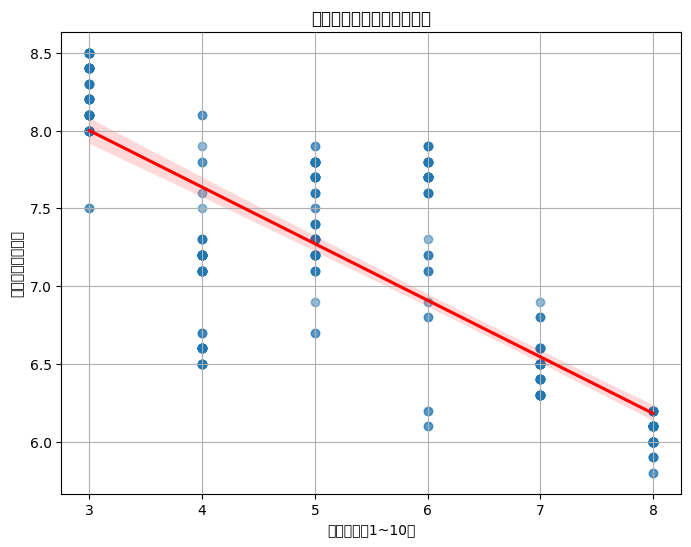

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('\xa0', '')  # 有些資料會混入這個

plt.figure(figsize=(8, 6))
sns.regplot(
    x="Stress Level",
    y="Sleep Duration",
    data=df,
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "red"}
)

plt.title("壓力程度與睡眠時數的關係")
plt.xlabel("壓力程度（1~10）")
plt.ylabel("睡眠時數（小時）")
plt.grid(True)
plt.show()


# **比較不同年齡層的平均壓力與平均睡眠時間，產出圖例**

In [43]:
grouped = df.groupby("age_group")[["Stress Level", "Sleep Duration"]].mean().reset_index()
print(grouped)


  age_group  Stress Level  Sleep Duration
0     18–29      7.315789        6.468421
1     30–49      5.590734        6.995753
2       50+      4.447917        7.631250


<ipython-input-43-1622016063>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby("age_group")[["Stress Level", "Sleep Duration"]].mean().reset_index()


<ipython-input-44-2157847076>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x="age_group", y="Stress Level", palette="coolwarm")
<ipython-input-44-2157847076>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x="age_group", y="Sleep Duration", palette="YlGnBu")
<ipython-input-44-2157847076>:20: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-44-2157847076>:20: UserWarning: Glyph 40801 (\N{CJK UNIFIED IDEOGRAPH-9F61}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-44-2157847076>:20: UserWarning: Glyph 21312 (\N{CJK UNIFIED IDEOGRAPH-5340}) missing from font(s

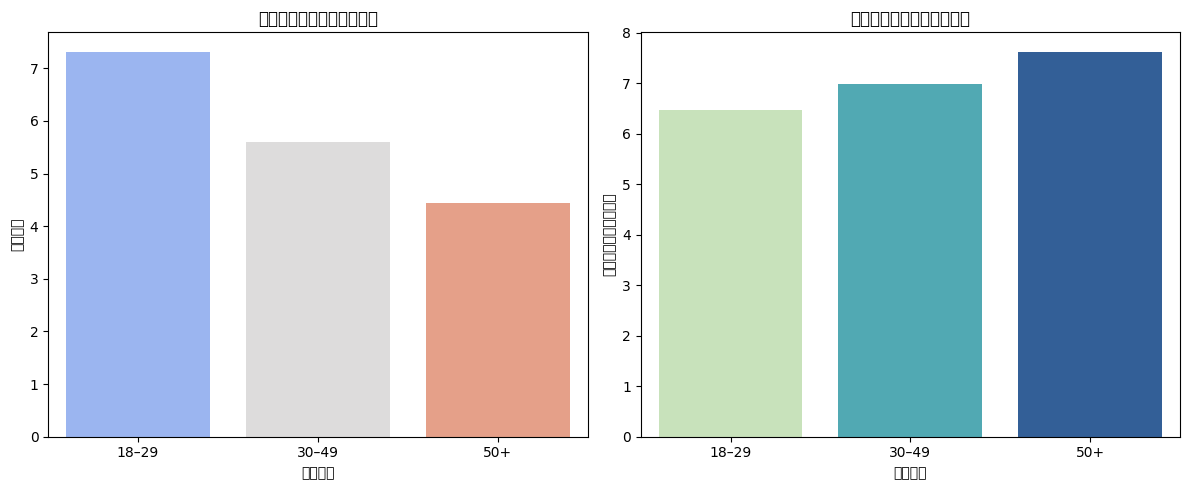

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# 圖1：平均壓力程度
plt.subplot(1, 2, 1)
sns.barplot(data=grouped, x="age_group", y="Stress Level", palette="coolwarm")
plt.title("不同年齡層的平均壓力程度")
plt.xlabel("年齡區間")
plt.ylabel("平均壓力")

# 圖2：平均睡眠時數
plt.subplot(1, 2, 2)
sns.barplot(data=grouped, x="age_group", y="Sleep Duration", palette="YlGnBu")
plt.title("不同年齡層的平均睡眠時數")
plt.xlabel("年齡區間")
plt.ylabel("平均睡眠時數（小時）")

plt.tight_layout()
plt.show()


# 探討高壓力且睡眠明顯不足（< 6 **小時）者的比例與特徵**

In [45]:
# 假設壓力等級為 7 以上視為「高壓力」
high_stress_threshold = 7
low_sleep_threshold = 6

# 篩選出符合條件的資料
df_high_stress_low_sleep = df[
    (df["Stress Level"] >= high_stress_threshold) &
    (df["Sleep Duration"] < low_sleep_threshold)
]


In [46]:
total_count = len(df)
target_count = len(df_high_stress_low_sleep)
percentage = (target_count / total_count) * 100

print(f"高壓力且睡眠不足者共 {target_count} 人，佔全體 {percentage:.1f}%")


高壓力且睡眠不足者共 6 人，佔全體 1.6%


In [47]:
# 先建立年齡層變數
df["age_group"] = df["Age"].apply(classify_age)  # 假設你已定義 classify_age() 函數

# 高壓力睡眠不足群體的基本特徵統計
print("年齡層分布：")
print(df_high_stress_low_sleep["age_group"].value_counts())
print("\n性別分布：")
print(df_high_stress_low_sleep["Gender"].value_counts())
print("\n職業分布：")
print(df_high_stress_low_sleep["Occupation"].value_counts())


年齡層分布：
age_group
18–29    3
30–49    3
50+      0
Name: count, dtype: int64

性別分布：
Gender
Male      3
Female    3
Name: count, dtype: int64

職業分布：
Occupation
Sales Representative    2
Scientist               2
Software Engineer       1
Nurse                   1
Name: count, dtype: int64


<ipython-input-48-1917428783>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_high_stress_low_sleep, x="age_group", palette="pastel")
<ipython-input-48-1917428783>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_high_stress_low_sleep, x="Gender", palette="Set2")
<ipython-input-48-1917428783>:16: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-48-1917428783>:16: UserWarning: Glyph 22739 (\N{CJK UNIFIED IDEOGRAPH-58D3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-48-1917428783>:16: UserWarning: Glyph 20302 (\N{CJK UNIFIED IDEOGRAPH-4F4E}) missing from font(s) DejaV

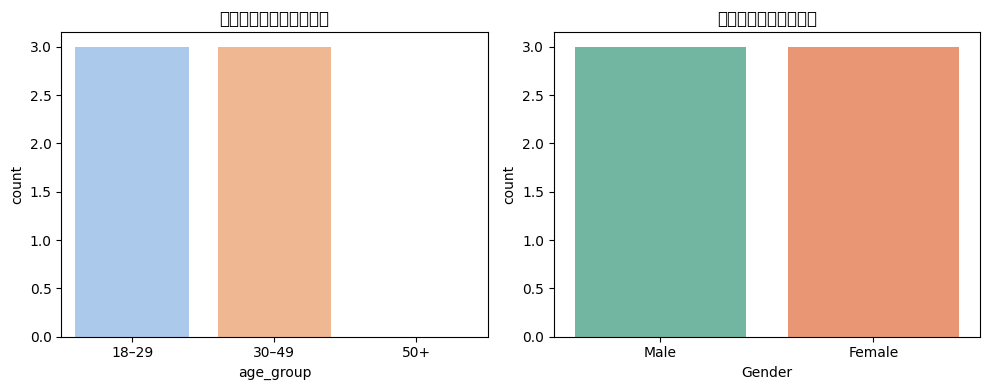

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# 年齡層分佈圖
plt.subplot(1, 2, 1)
sns.countplot(data=df_high_stress_low_sleep, x="age_group", palette="pastel")
plt.title("高壓低眠者的年齡層分佈")

# 性別分佈圖
plt.subplot(1, 2, 2)
sns.countplot(data=df_high_stress_low_sleep, x="Gender", palette="Set2")
plt.title("高壓低眠者的性別分佈")

plt.tight_layout()
plt.show()
